# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Beam Spreading
***

Referring to Section 2.7.3, the refractive index is a function of altitude, the antenna beam will spread in the vertical direction.  This is due to the refractive index causing energy at the bottom of the beam to travel along a slightly different path than energy at the top of the beam. This beam spreading results in a loss in the peak gain, which is insignificant and may be ignored for elevation angles greater than $5^o$.  In addition, there is no spreading in the horizontal direction.  If the signal travels through the total atmosphere, then the total loss is (Equation 2.129)

$$
A = -10 \log(B) \hspace{0.5in} \text{(dB)}
$$

and

$$
B = 1 - \left[0.5411 + 0.07446 \, \theta + (0.06272 + 0.0276 \,  \theta) \, h + 0.008288\,  h^2\right] \Big[ 1.728 + 0.5411  \, \theta + (0.1815 + 0.06272 \,  \theta + 0.0138\,  \theta^2 ) \, h  + (0.01727 + 0.008288 \,  \theta)\, h^2\Big]^2
$$

The expression above is only valid when $\theta < 10^o$ and $h \le 5$ km.
***

Set the elevation angle (degrees) and the height (km)

In [1]:
elevation_angle = 5.0

height = 5.0

Set up the elevation and height arrays using `linspace` and `meshgrid` from `scipy`

In [2]:
from numpy import linspace, meshgrid

theta, height = meshgrid(linspace(0.0, elevation_angle, 200), linspace(0.0, height, 200))

Calculate the beam spreading loss (dB)

In [3]:
from numpy import log10

b = 1. - (0.5411 + 0.07446 * theta + (0.06272 + 0.0276 * theta) * height + 0.008288 * height ** 2) / \
            (1.728 + 0.5411 * theta + (0.1815 + 0.06272 * theta + 0.0138 * theta ** 2) * height +
             (0.01727 + 0.008288 * theta) * height ** 2) ** 2



beam_spreading_loss = -10. * log10(b)

Display the beam spreading loss using the `matplotlib` routines

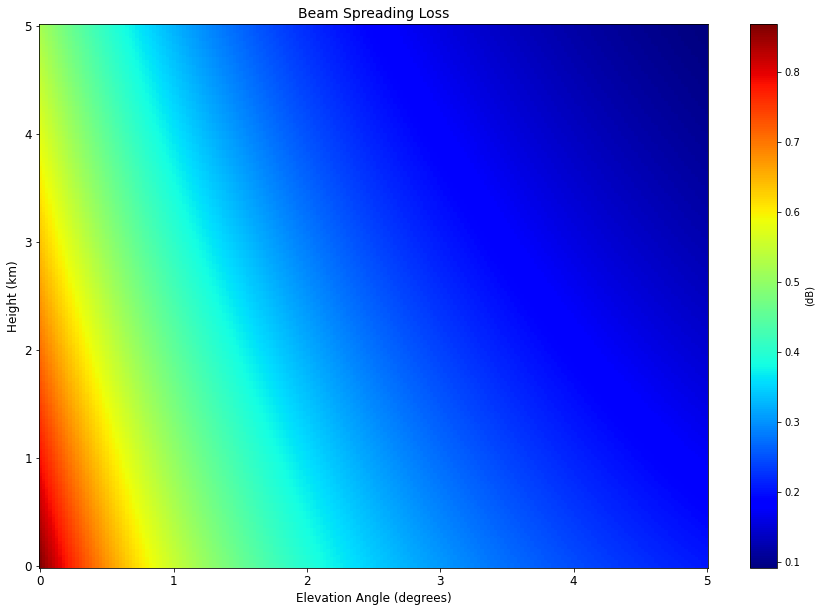

In [4]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)




# Display the results


im = plt.pcolor(theta, height, beam_spreading_loss, cmap="jet", shading = 'auto')

cbar = plt.colorbar(im, orientation='vertical')

cbar.set_label("(dB)")



# Set the plot title and labels

plt.title('Beam Spreading Loss', size=14)

plt.xlabel('Elevation Angle (degrees)', size=12)

plt.ylabel('Height (km)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)